<h4>Obtener los datos</h4>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn-v0_8-whitegrid")


In [36]:
df = pd.read_csv("Scripts/eurusd.csv", parse_dates = ["Date"], index_col = ["Date"])

In [37]:
df

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
...,...
2020-06-24,1.131235
2020-06-25,1.125087
2020-06-26,1.122208


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4275 entries, 2004-01-01 to 2020-06-30
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   4275 non-null   float64
dtypes: float64(1)
memory usage: 66.8 KB


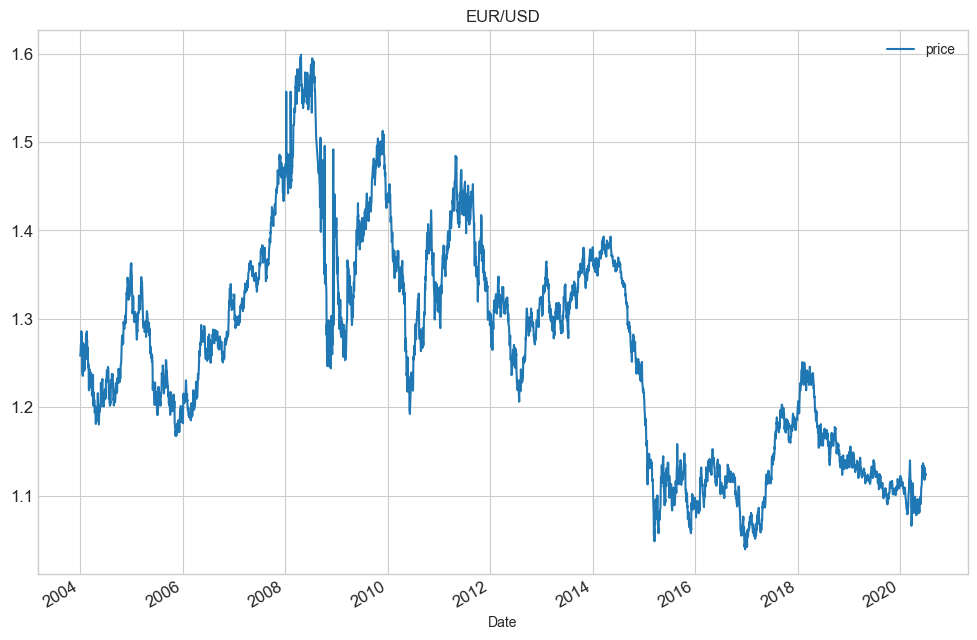

In [39]:
df.plot(figsize = (12, 8), title = "EUR/USD", fontsize = 12 )
plt.show()

In [40]:
df.head(30)

,price
Date,
2004-01-01,1.258194
2004-01-02,1.258194
2004-01-05,1.268698
2004-01-06,1.272103
2004-01-07,1.264095
2004-01-08,1.277498
2004-01-09,1.285892
2004-01-12,1.274096
2004-01-13,1.278593


En la siguiente instrucción se van a calcular los retornos. La mecánica es la siguiente:
1. Se desplazan todas las filas del dataframe una posición hacia abajo, alineando cada valor con el del día anterior (el día 1 pasa a ser el día 2, el día 2 el día 3 y así sucesivamente). El día 1 original que dará vacío (NaN) porque fué desplazado
2. Luego divide cada valor del día actual entre el valor del día anterior.
3. Calcula el logaritmo natural del cociente (dia_actual/dia_anterior)



In [41]:
df["returns"] = np.log(df.div(df.shift(1)))
df

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


In [42]:
df.head(30)

,price,returns
Date,,
2004-01-01,1.258194,NaN
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
2004-01-09,1.285892,0.006549
2004-01-12,1.274096,-0.009216
2004-01-13,1.278593,0.003523


In [43]:
df.dropna(inplace=True)

In [44]:
df

,price,returns
Date,,
2004-01-02,1.258194,0.000000
2004-01-05,1.268698,0.008313
2004-01-06,1.272103,0.002681
2004-01-07,1.264095,-0.006315
2004-01-08,1.277498,0.010547
...,...,...
2020-06-24,1.131235,0.002892
2020-06-25,1.125087,-0.005449
2020-06-26,1.122208,-0.002562


Text(0.5, 1.0, 'EUR/USD RETURNS')

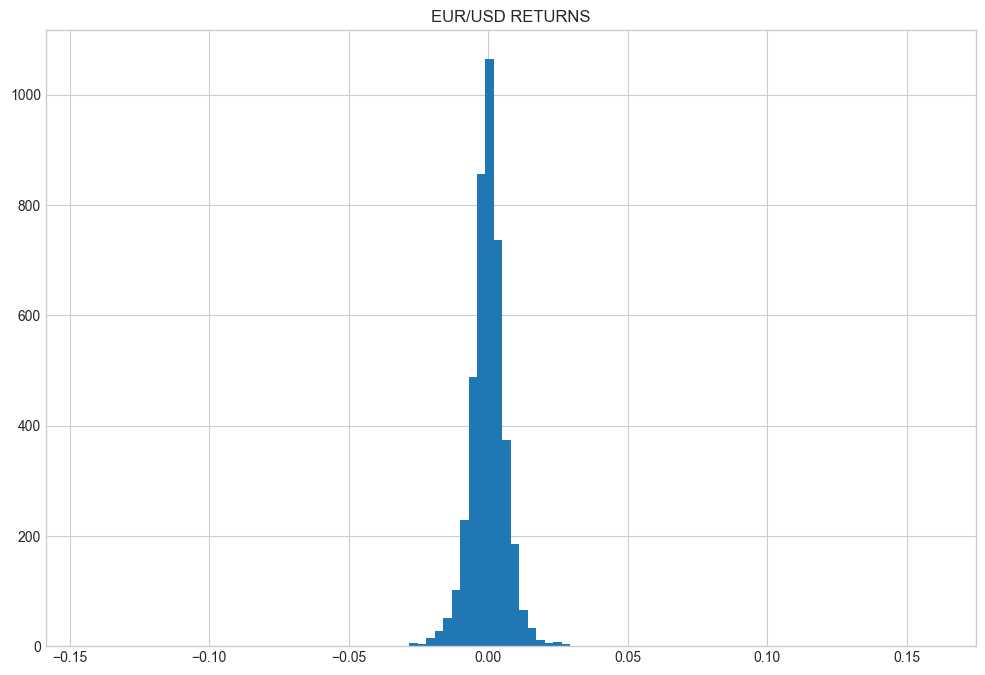

In [45]:
df.returns.hist(bins=100, figsize=(12,8))
plt.title("EUR/USD RETURNS")

En la gráfica anterior se puede observar que los retornos se agrupan alrededor de cero, algunos son positivos (y de valor alto) y otros son negativos (también de valor alto)
Los retornos acumulados en el periodo considerado (16 años) se pueden calcular tomando la sumatoria de todos los retornos y se obtiene un retorno acumulado de -11%, tal como se muestra en la celda de abajo y lo cual implica una pérdida de 11%

In [46]:
df.returns.sum()

np.float64(-0.11214302770699758)

Para calcular el valor de un dolar invertido en euros al cabo de 16 años, tomamos el antilogaritmo de la sumatoria de retornos:

In [47]:
np.exp(df.returns.sum())

np.float64(0.8939163935445148)

El cálculo anterior se puede verificar tomando el último precio (2020) y lo dividimos por el precio inicial (2004)

In [48]:
df.price[-1] / df.price[0]

C:\Users\marioL\AppData\Local\Temp\ipykernel_8936\1327233477.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df.price[-1] / df.price[0]


np.float64(0.8939163935445141)

También es posible calcular el valor de nuestra inversión a medida que transcurre el tiempo, es decir, en cada una de las fechas (timestamp) del dataframe.
Para ello se usa el método cumsum() para calcular desde la fecha inicial el retorno acumulado en cada fecha del dataframe

In [49]:
df.returns.cumsum()

Date
2004-01-02    0.000000
2004-01-05    0.008313
2004-01-06    0.010994
2004-01-07    0.004679
2004-01-08    0.015226
                ...   
2020-06-24   -0.106368
2020-06-25   -0.111817
2020-06-26   -0.114379
2020-06-29   -0.114042
2020-06-30   -0.112143
Name: returns, Length: 4274, dtype: float64

In [52]:
#los valores anteriores corresponden a porcentajes. Para obtener los
# retornos acumulativos reales usar el método exp()
df["creturns"] = df.returns.cumsum().apply(np.exp)
df

,price,returns,creturns
Date,,,
2004-01-02,1.258194,0.000000,1.000000
2004-01-05,1.268698,0.008313,1.008348
2004-01-06,1.272103,0.002681,1.011055
2004-01-07,1.264095,-0.006315,1.004690
2004-01-08,1.277498,0.010547,1.015343
...,...,...,...
2020-06-24,1.131235,0.002892,0.899094
2020-06-25,1.125087,-0.005449,0.894208
2020-06-26,1.122208,-0.002562,0.891920


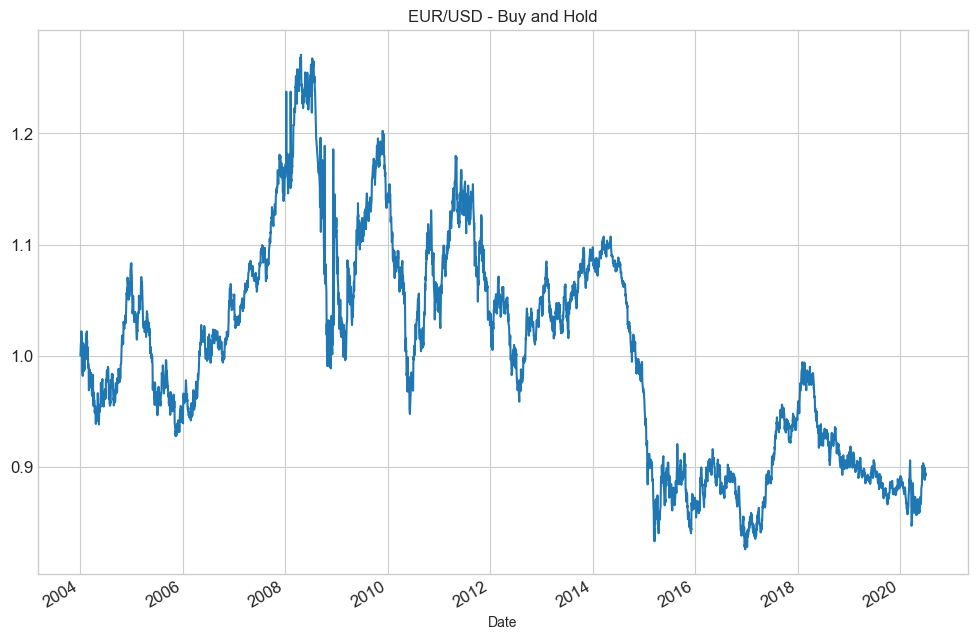

In [53]:
#por último graficamos los retornos acumulativos
df.creturns.plot(figsize=(12,8), title="EUR/USD - Buy and Hold", fontsize=12)
plt.show()

La gráfica anterior es muy similar a la gráfica generada en la celda 39, con la diferencia que es esta aparecen los valores "normalizados", empezando en 1 (inversión inicial) y el valor al final del ciclo en 0.89. 